In [2]:
!git clone https://github.com/Abdulwahabbitar/student-performance-prediction.git


Cloning into 'student-performance-prediction'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 80.61 KiB | 2.30 MiB/s, done.


In [62]:
import pandas as pd

data_path = '/content/student-performance-prediction/student-performance-prediction/data/student_data.csv'
df = pd.read_csv(data_path)

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [63]:
print("Shape of dataset:", df.shape)
print("\nData types:")
print(df.dtypes)


Shape of dataset: (4424, 35)

Data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder            

In [64]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Columns with missing values:\n", missing)


Columns with missing values:
 Series([], dtype: int64)


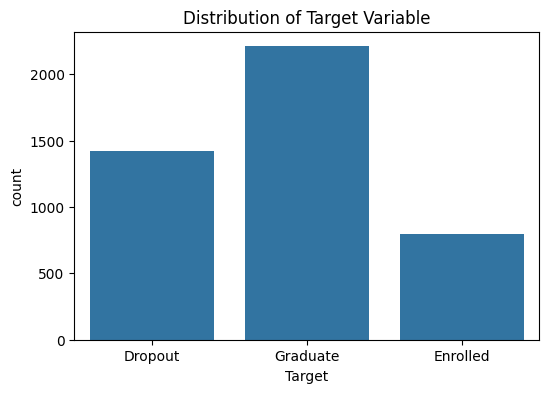

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

print(df['Target'].value_counts(normalize=True))


In [66]:
df['Target'] = df['Target'].map({'Graduate':0, 'Dropout':1, 'Enrolled':2})


In [67]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)


                                           Feature      F-Score        p-value
24             Curricular units 2nd sem (approved)  1410.732938   0.000000e+00
25                Curricular units 2nd sem (grade)  1134.109544   0.000000e+00
18             Curricular units 1st sem (approved)   859.866768  3.649472e-316
19                Curricular units 1st sem (grade)   713.517328  2.803052e-269
11                         Tuition fees up to date   505.621429  1.784950e-198
13                              Scholarship holder   225.751437   4.436825e-94
14                               Age at enrollment   154.712071   1.138849e-65
10                                          Debtor   137.647527   1.018223e-58
12                                          Gender   123.041811   9.950346e-53
1                                 Application mode   104.350747   5.226530e-45
23          Curricular units 2nd sem (evaluations)    87.801092   4.039137e-38
22             Curricular units 2nd sem (enrolled)  

In [68]:
low_impact_features = [
    'Inflation rate',
    'Course',
    'International',
    'Nacionality',
    'Educational special needs'
]

df.drop(columns=low_impact_features, inplace=True)


In [69]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,GDP,Target
0,1,8,5,1,1,13,10,6,10,1,...,0,0,0,0,0,0.000000,0,10.8,1.74,1
1,1,6,1,1,1,1,3,4,4,1,...,0,0,6,6,6,13.666667,0,13.9,0.79,0
2,1,1,5,1,1,22,27,10,10,1,...,0,0,6,0,0,0.000000,0,10.8,1.74,1
3,1,8,2,1,1,23,27,6,4,1,...,0,0,6,10,5,12.400000,0,9.4,-3.12,0
4,2,12,1,0,1,22,28,10,10,0,...,0,0,6,6,6,13.000000,0,13.9,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,1,1,6,5,0,...,0,0,6,8,5,12.666667,0,15.5,-4.06,0
4420,1,1,2,1,1,1,1,10,10,1,...,0,0,6,6,2,11.000000,0,11.1,2.02,1
4421,1,1,1,1,1,22,27,10,10,1,...,0,0,8,9,1,13.500000,0,13.9,0.79,1
4422,1,1,1,1,1,22,27,8,5,1,...,0,0,5,6,5,12.000000,0,9.4,-3.12,0


In [70]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  stratify=y_train,
                                                  random_state=42)



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np





X_train_transformed = X_train.copy()


high_skew_cols_pos = ['Marital status', 'Previous qualification', 'Nacionality', 'Educational special needs',
                      'Debtor', 'International', 'Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (without evaluations)']

high_skew_cols_neg = ['Daytime/evening attendance', 'Tuition fees up to date',
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)']


for col in high_skew_cols_pos:
    if (X_train_transformed[col] < 0).any():
        print(f"تحذير: العمود {col} يحتوي قيم سالبة!")
    else:
        X_train_transformed[col] = np.log1p(X_train_transformed[col])

for col in high_skew_cols_neg:
    max_val = X_train_transformed[col].max()
    X_train_transformed[col] = np.log1p(max_val + 1 - X_train_transformed[col])

def transform_dataset(df):
    df_copy = df.copy()
    for col in high_skew_cols_pos:
        if (df_copy[col] < 0).any():
            print(f"تحذير: العمود {col} يحتوي قيم سالبة!")
        else:
            df_copy[col] = np.log1p(df_copy[col])
    for col in high_skew_cols_neg:
        max_val = df_copy[col].max()
        df_copy[col] = np.log1p(max_val + 1 - df_copy[col])
    return df_copy

X_val_transformed = transform_dataset(X_val)
X_test_transformed = transform_dataset(X_test)  # افترض أن X_test موجود عندك


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_val_scaled = scaler.transform(X_val_transformed)
X_test_scaled = scaler.transform(X_test_transformed)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("بعد SMOTE:", X_train_resampled.shape, y_train_resampled.shape)





بعد SMOTE: (2169, 34) (2169,)


In [72]:
X_train_scaled = X_train_resampled
y_train = y_train_resampled


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.7713498622589532

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       181
           1       0.74      0.86      0.80       117
           2       0.51      0.42      0.46        65

    accuracy                           0.77       363
   macro avg       0.71      0.71      0.70       363
weighted avg       0.77      0.77      0.77       363


Confusion Matrix (Validation):
[[152  12  17]
 [  7 101   9]
 [ 15  23  27]]


In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_val_pred = xgb_model.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:38:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.7713498622589532

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       181
           1       0.80      0.81      0.81       117
           2       0.52      0.43      0.47        65

    accuracy                           0.77       363
   macro avg       0.71      0.70      0.71       363
weighted avg       0.76      0.77      0.77       363


Confusion Matrix:
[[157   9  15]
 [ 11  95  11]
 [ 22  15  28]]


In [75]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best cross-validation accuracy: 0.8155832180728445


In [76]:
from xgboost import XGBClassifier


best_params = random_search.best_params_


xgb_best = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    min_child_weight=best_params['min_child_weight'],
    random_state=42,
    eval_metric='mlogloss',
)


xgb_best.fit(X_train_scaled, y_train)


y_val_pred = xgb_best.predict(X_val_scaled)

from sklearn.metrics import accuracy_score, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.768595041322314
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       181
           1       0.79      0.82      0.81       117
           2       0.49      0.45      0.47        65

    accuracy                           0.77       363
   macro avg       0.71      0.71      0.71       363
weighted avg       0.76      0.77      0.77       363



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



Validation Accuracy: 0.7713498622589532
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       181
           1       0.83      0.81      0.82       117
           2       0.49      0.52      0.50        65

    accuracy                           0.77       363
   macro avg       0.72      0.72      0.72       363
weighted avg       0.78      0.77      0.77       363



In [78]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=500, random_state=42)

ensemble = VotingClassifier(
    estimators=[('xgb', xgb), ('rf', rf), ('lr', lr)],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)
y_pred = ensemble.predict(X_val_scaled)

print("Ensemble Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Validation Accuracy: 0.7823691460055097
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       181
           1       0.80      0.83      0.82       117
           2       0.53      0.42      0.47        65

    accuracy                           0.78       363
   macro avg       0.72      0.71      0.71       363
weighted avg       0.77      0.78      0.78       363



In [79]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]


stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)


stacking_clf.fit(X_train_scaled, y_train)


y_pred = stacking_clf.predict(X_val_scaled)


print("Stacking Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Validation Accuracy: 0.790633608815427
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       181
           1       0.80      0.85      0.82       117
           2       0.56      0.45      0.50        65

    accuracy                           0.79       363
   macro avg       0.74      0.72      0.73       363
weighted avg       0.78      0.79      0.78       363



In [89]:
y_test_pred = stacking_clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.7502824858757062

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       442
           1       0.79      0.83      0.81       284
           2       0.43      0.44      0.44       159

    accuracy                           0.75       885
   macro avg       0.69      0.69      0.69       885
weighted avg       0.75      0.75      0.75       885


Confusion Matrix (Test):
[[358  25  59]
 [ 16 236  32]
 [ 51  38  70]]


In [ ]:
y_test_pred = stacking_clf.predict(X_test_scaled)

# تقييم الأداء على بيانات التيست
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


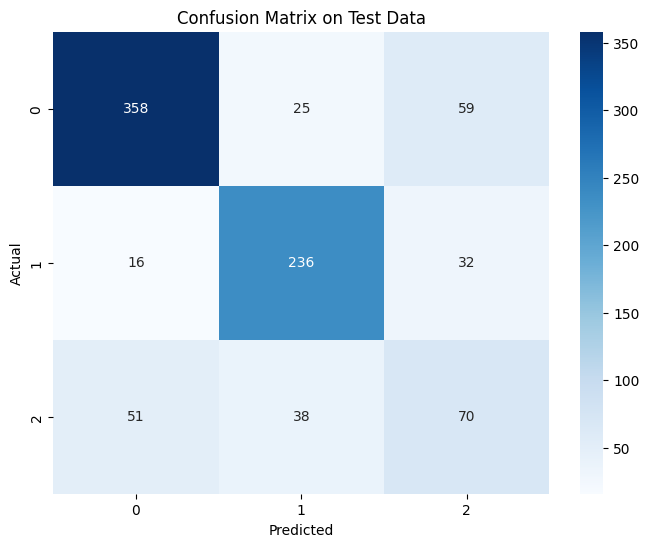

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()
